In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UberDataset.csv')

In [ ]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.shape

(1156, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
Null_per_Col = df.isna().sum()
print("Number of NaN values per column: ")
print(Null_per_Col)

Number of NaN values per column: 
START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


In [ ]:
# Convert the 'START_DATE' and 'END_DATE' columns to datetime with 'coerce'
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

# Now, check the data types of 'START_DATE' and 'END_DATE' columns
print("Data type of 'START_DATE':", df['START_DATE'].dtype)
print("Data type of 'END_DATE':", df['END_DATE'].dtype)

Data type of 'START_DATE': datetime64[ns]
Data type of 'END_DATE': datetime64[ns]


In [ ]:
# word Karachi is not spelled correctly
# Replace "Kar?chi" with "Karachi" in 'START' and 'STOP' columns
df['START'] = df['START'].replace("Kar?chi", "Karachi")
df['STOP'] = df['STOP'].replace("Kar?chi", "Karachi")

In [ ]:
drop_colunm = df.drop(['PURPOSE'],axis=1)

In [ ]:
average_miles_by_purpose = df.groupby('PURPOSE')['MILES'].mean()
average_miles_by_purpose

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.247594
Moving               4.550000
Temporary Site      10.474000
Name: MILES, dtype: float64

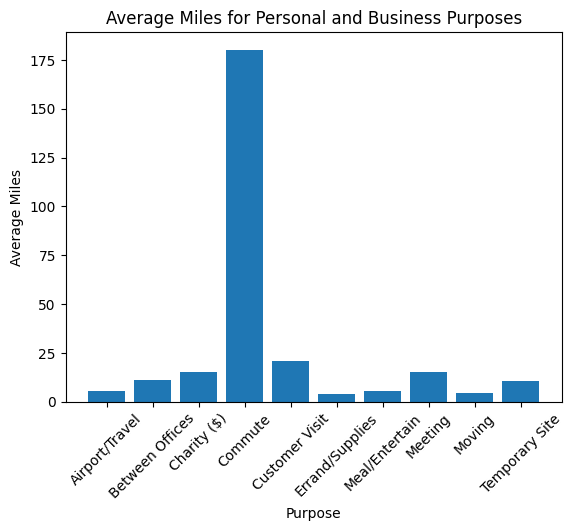

In [ ]:
# Plotting the bar chart
plt.bar(average_miles_by_purpose.index, average_miles_by_purpose.values )
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
average_miles_by_cat =df.groupby('CATEGORY')['MILES'].mean()
average_miles_by_cat

CATEGORY
Business    10.655844
Personal     9.320779
Name: MILES, dtype: float64

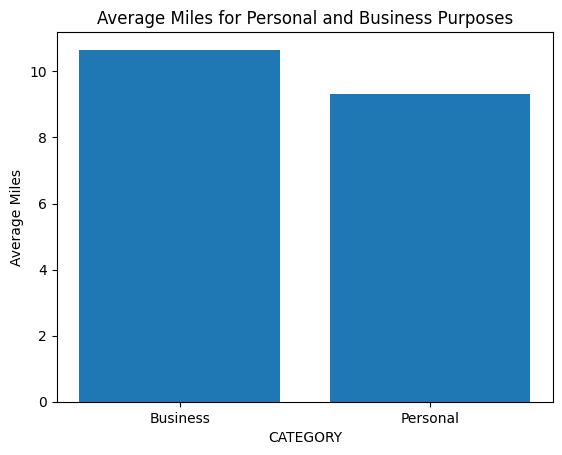

In [ ]:
plt.bar(average_miles_by_cat.index, average_miles_by_cat.values )
plt.xlabel('CATEGORY')
plt.ylabel('Average Miles')
plt.title('Average Miles for Personal and Business Purposes')
plt.show()

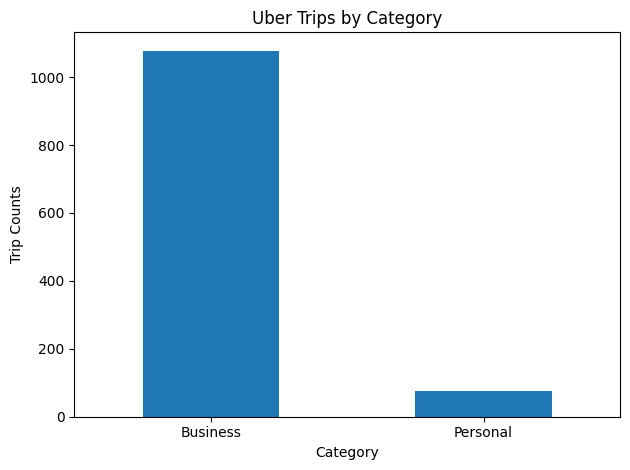

In [ ]:
trips = pd.DataFrame(df["CATEGORY"].value_counts())

ax = trips.plot(kind="bar",  legend=None)

plt.xlabel('Category')
plt.ylabel('Trip Counts')
plt.title('Uber Trips by Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate ride durations as the difference between END_DATE and START_DATE
df['ride_duration'] =df['END_DATE'] - df['START_DATE']

# Calculate min, max, and average ride durations
min_duration = df['ride_duration'].min()
max_duration = df['ride_duration'].max()
average_duration =df['ride_duration'].mean()

print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", average_duration)

Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 05:36:00
Average ride duration: 0 days 00:23:14.597402597


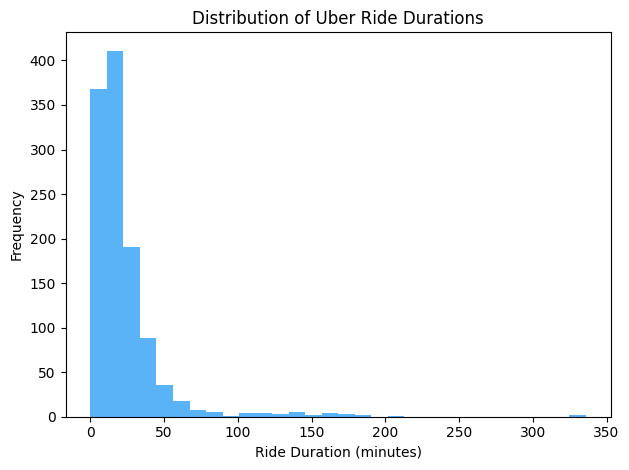

In [ ]:

plt.hist(df['ride_duration'].dt.total_seconds() / 60, bins=30 , color= '#5AB2F7')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Uber Ride Durations')
plt.tight_layout()
plt.show()

In [ ]:
#Here I have done Data Analysis and plotted graphs on the Uber dataset downloaded from kaggle